In [10]:
!pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 323.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB 660.6 kB/s eta 0:01:08
   ---------------------------------------- 0.1/44.5 MB 469.7 kB/s eta 0:01:35
   ---------------------------------------- 0.1/44.5 MB 438.9 kB/s eta 0:01:42
   ---------------------------------------- 0.1/44.5 MB 438.9 kB/s eta 0:01:42
   ---------------------------------------- 0.1/44.5 MB 409.6 kB/s eta 0:01:49


First few rows of the dataset:
           Country Name Country Code_x     MPA  \
0                Angola            AGO   0.005   
1               Albania            ALB   2.839   
2  United Arab Emirates            ARE  11.270   
3             Argentina            ARG  11.768   
4   Antigua and Barbuda            ATG   0.182   

   Share of global plastics emitted to ocean  FisheryConsumption  
0                                   0.087804           401696.00  
1                                   0.159782            15011.50  
2                                   0.001429            75357.00  
3                                   0.422376           828687.19  
4                                   0.000204             3185.00  

Column names in the dataset:
Index(['Country Name', 'Country Code_x', 'MPA',
       'Share of global plastics emitted to ocean', 'FisheryConsumption'],
      dtype='object')

Summary statistics of the dataset:
              MPA  Share of global plastics emitted to 

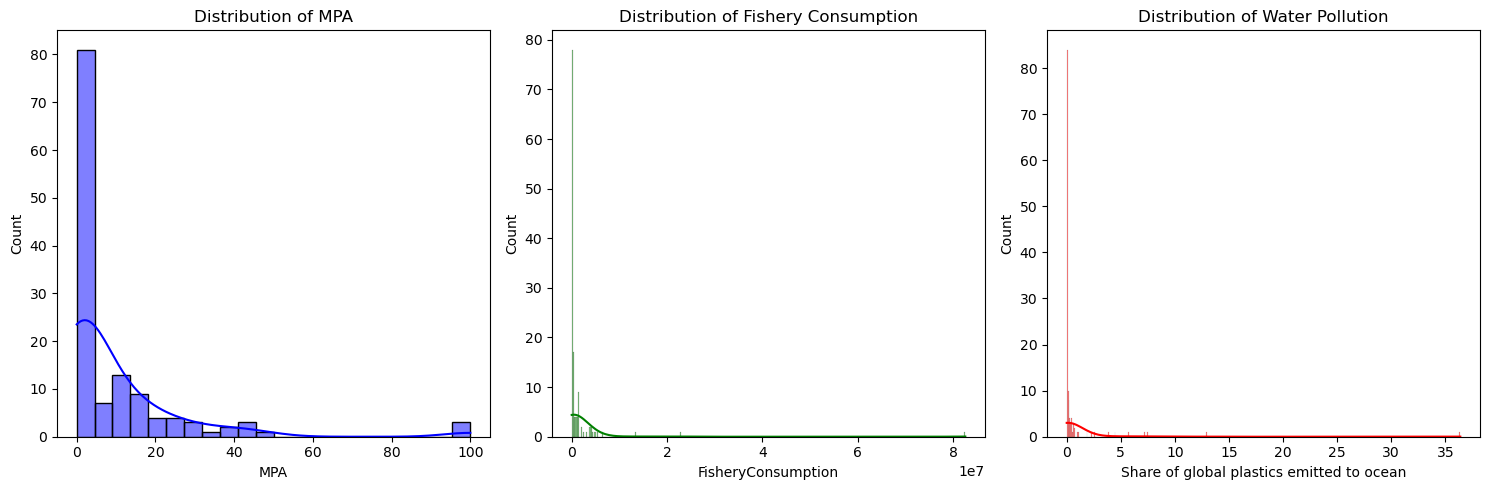

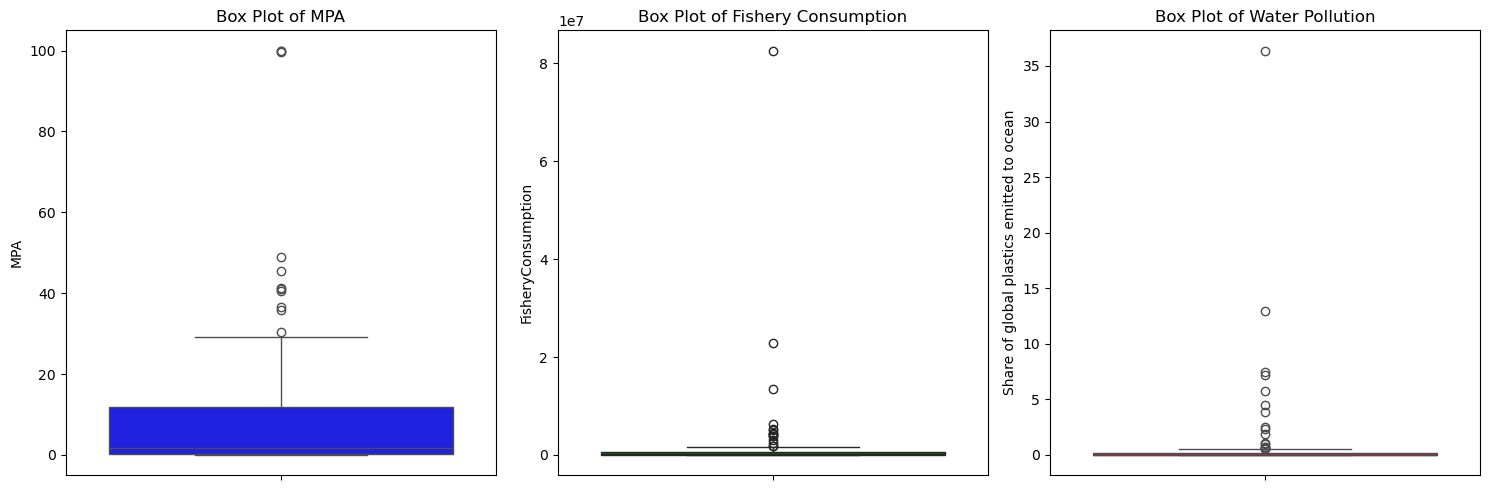

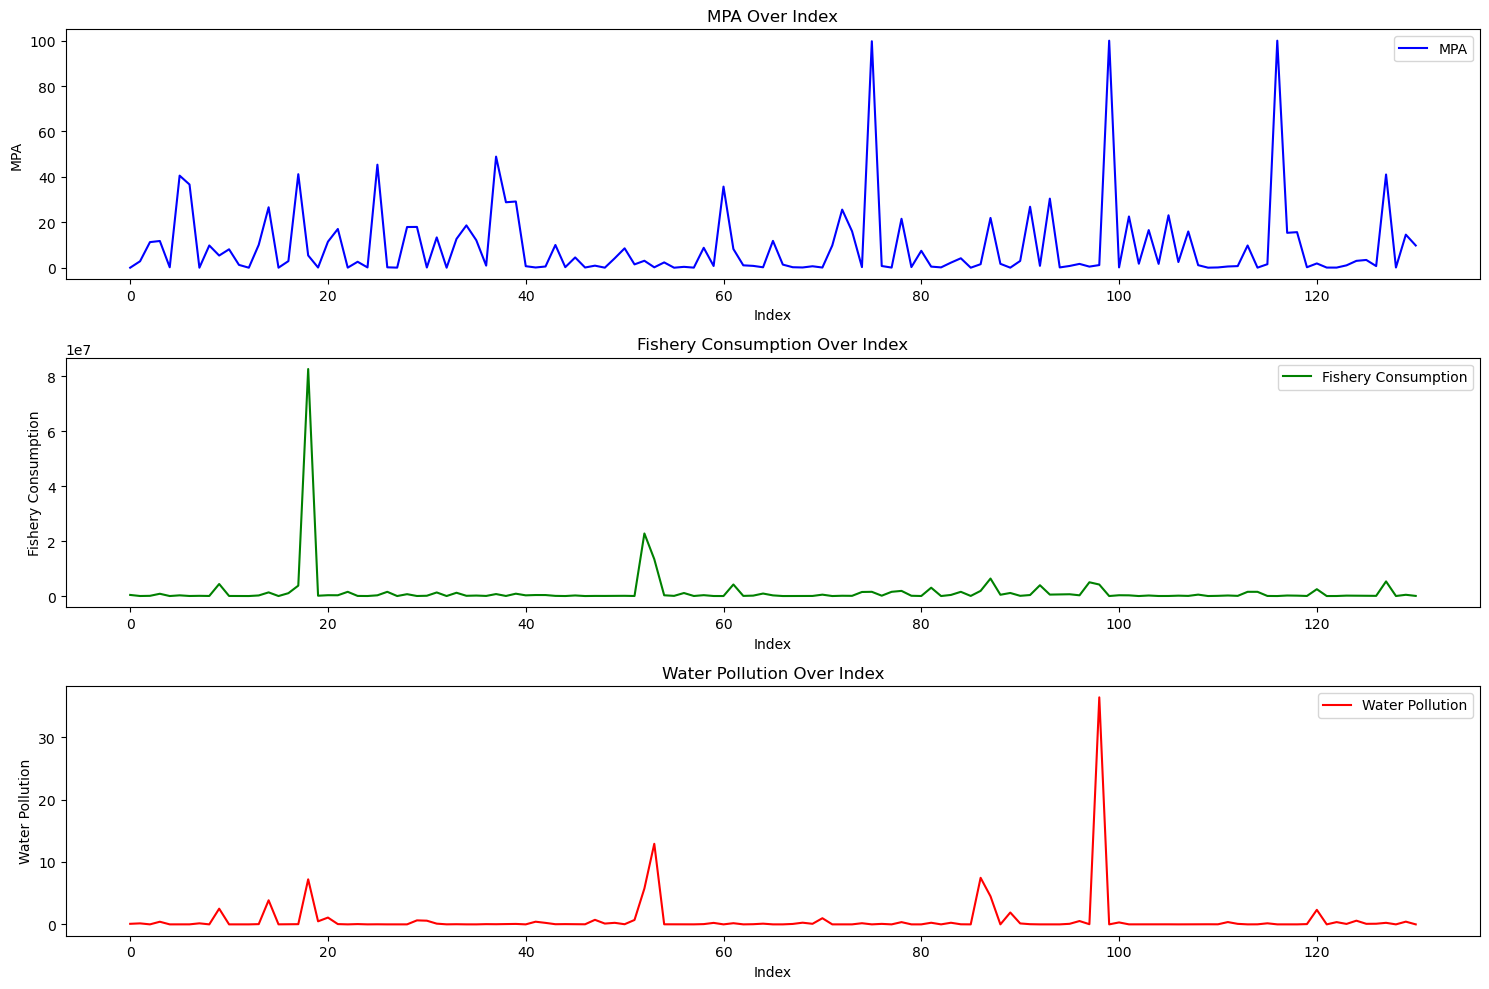

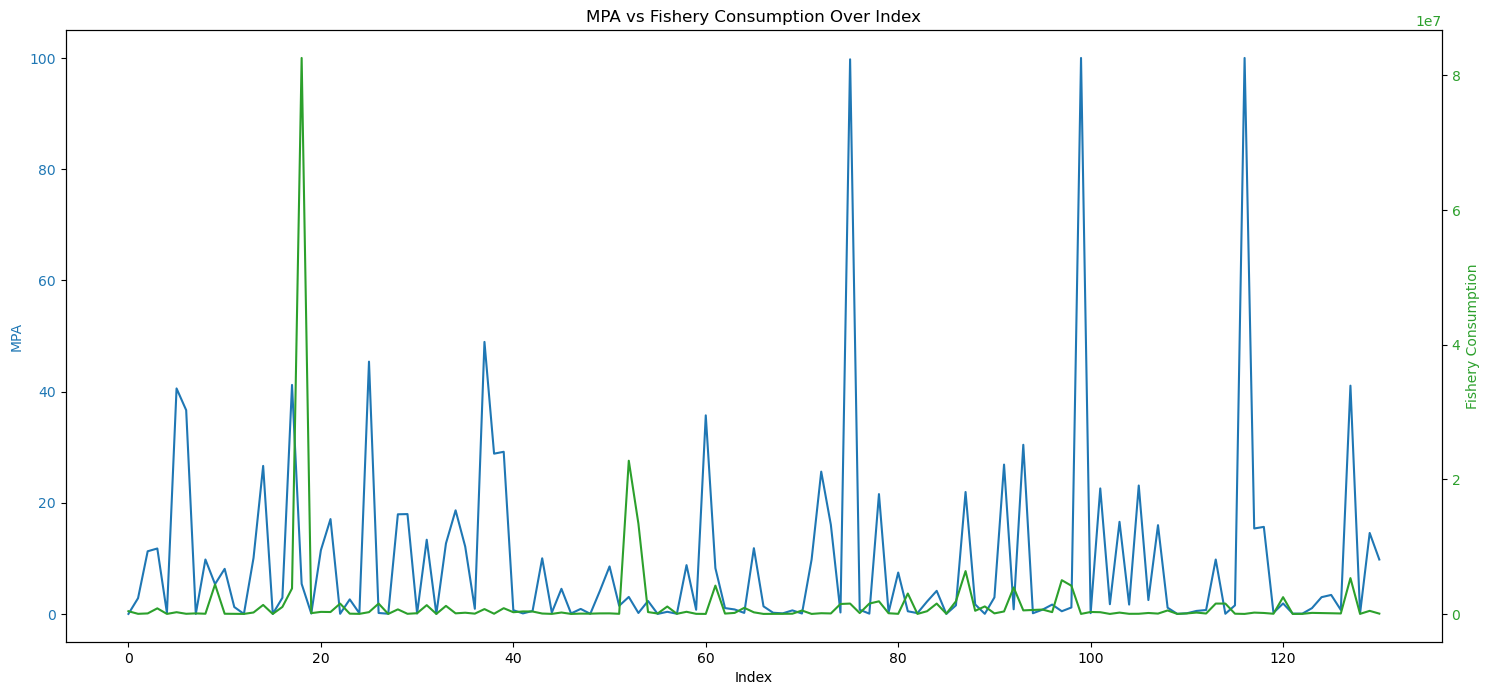

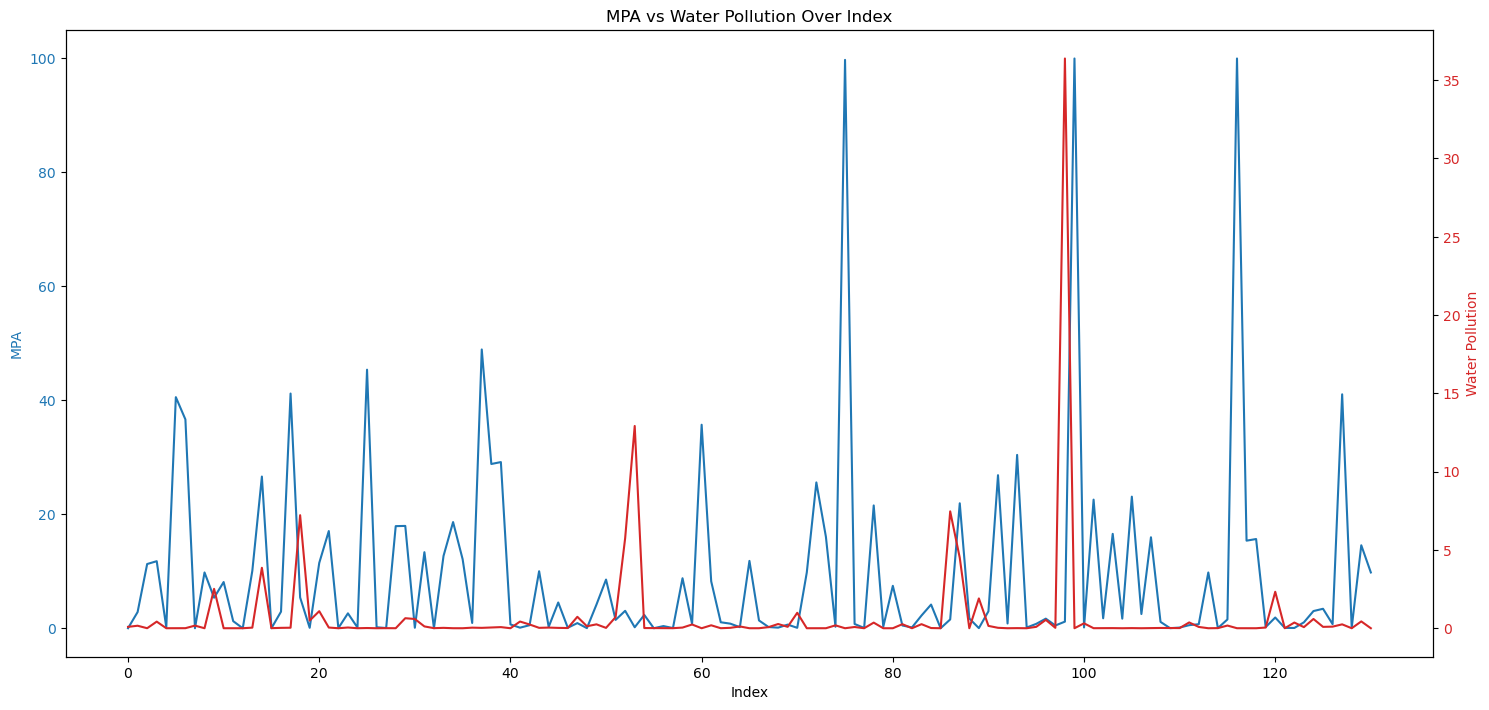

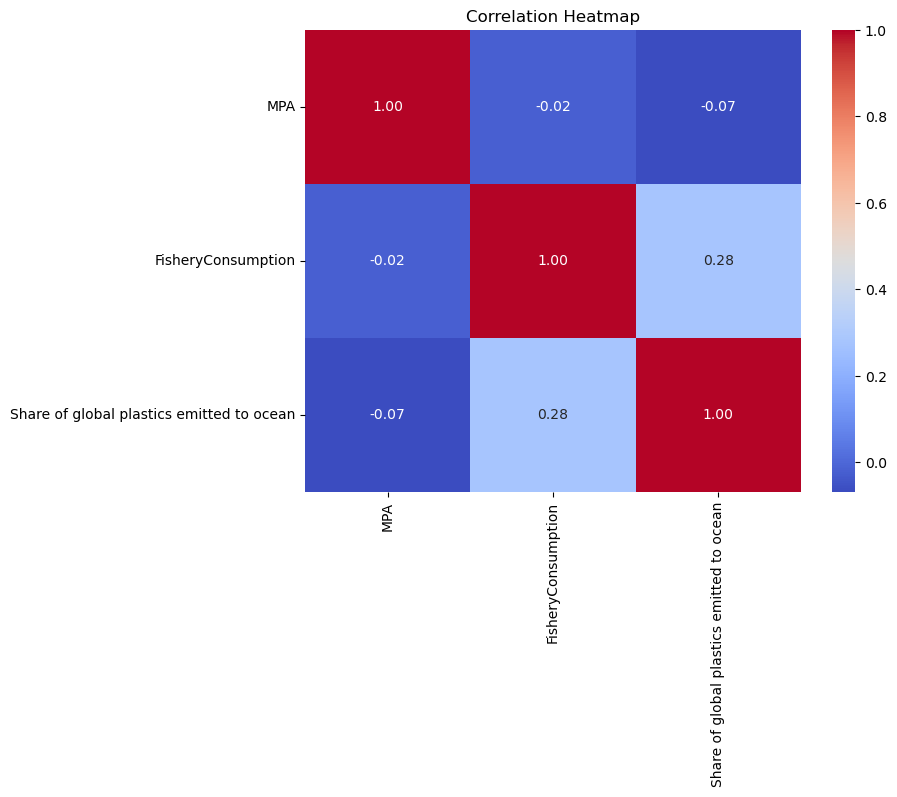

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Ishita\Downloads\final merge.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the column names
print("\nColumn names in the dataset:")
print(df.columns)

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Drop missing values (if applicable)
df_cleaned = df.dropna()

# Check for duplicates
print("\nNumber of duplicate rows in the dataset:")
print(df_cleaned.duplicated().sum())

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Generate summary statistics of the cleaned dataset
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

# Define column names for easier reference
mpa_col = 'MPA'
fishery_col = 'FisheryConsumption'
pollution_col = 'Share of global plastics emitted to ocean'

# Visualize data distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned[mpa_col], kde=True, color='b')
plt.title('Distribution of MPA')

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned[fishery_col], kde=True, color='g')
plt.title('Distribution of Fishery Consumption')

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned[pollution_col], kde=True, color='r')
plt.title('Distribution of Water Pollution')

plt.tight_layout()
plt.show()

# Box plots to check for anomalies/outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned[mpa_col], color='b')
plt.title('Box Plot of MPA')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned[fishery_col], color='g')
plt.title('Box Plot of Fishery Consumption')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned[pollution_col], color='r')
plt.title('Box Plot of Water Pollution')

plt.tight_layout()
plt.show()

# Line graphs to visualize trends over index
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df_cleaned.index, df_cleaned[mpa_col], label='MPA', color='b')
plt.title('MPA Over Index')
plt.xlabel('Index')
plt.ylabel('MPA')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_cleaned.index, df_cleaned[fishery_col], label='Fishery Consumption', color='g')
plt.title('Fishery Consumption Over Index')
plt.xlabel('Index')
plt.ylabel('Fishery Consumption')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_cleaned.index, df_cleaned[pollution_col], label='Water Pollution', color='r')
plt.title('Water Pollution Over Index')
plt.xlabel('Index')
plt.ylabel('Water Pollution')
plt.legend()

plt.tight_layout()
plt.show()

# Dual-axis line graphs to show relationships between MPA, Fishery Consumption, and Water Pollution

# MPA vs Fishery Consumption
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('MPA', color=color)
ax1.plot(df_cleaned.index, df_cleaned[mpa_col], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Fishery Consumption', color=color)  # we already handled the x-label with ax1
ax2.plot(df_cleaned.index, df_cleaned[fishery_col], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MPA vs Fishery Consumption Over Index')
plt.show()

# MPA vs Water Pollution
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('MPA', color=color)
ax1.plot(df_cleaned.index, df_cleaned[mpa_col], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Water Pollution', color=color)  # we already handled the x-label with ax1
ax2.plot(df_cleaned.index, df_cleaned[pollution_col], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MPA vs Water Pollution Over Index')
plt.show()

# Correlation matrix heatmap to visualize correlations
corr_matrix = df_cleaned[[mpa_col, fishery_col, pollution_col]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
